# Data Science - Social Media Analytics SoSe 24 📊🔍

## Problemset 1 📝

This notebook represents my submission for the weekly tasks in Social Media Analytics for the summer semester of 2024.

### Authors 👥
- **Martin Brucker** (942815) 🧑‍💻
- **Frederik Brinkmann** (943915) 🧑‍💻

**Due**: Friday, 3 May 2024, 11:59 PM

**Contact Information**: martin.brucker@student.fh-kiel.de 📧

Your role is that of a data scientist working for a company that provides sentiment analysis services to restaurants. The company has provided you with a dataset of reviews
(restaurant-reviews.csv) for different restaurants located in Kiel. The dataset contains the
following columns:

- name: Name of the restaurant
- restaurant_url: URL of the restaurant on the tripadvisor website
- title: Title of the review
- text: Text of the review
- rating: Rating of the review (1-5)


Your task is to carry out a machine learning experiment to predict the rating of a review on a
scale from 1 - 5 based only on the text of the review. The focus will be on the selection of text
preprocessing and feature engineering strategies. In the exercises, not all details are specified.
Make reasonable assumptions and decisions, and document them in your submission.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/restaurant-reviews.csv')

# Exercise 1
The first part of your experiment is about a systematic analysis of the effectiveness of
different text preprocessing techniques. In this part of the experiment, vectorize the texts
using Bag of Words and choose a baseline machine learning algorithm with default hyperparameters. Vary ONLY your text preprocessing strategy (e.g. lowercasing, stopword removal,
stemming, lemmatization, or some combination of these). Keep the rest of your setup fixed.
Evaluate the performance of your models on a holdout set. Provide a table with the evaluation
results. The table should also show the number of features used in each case. Briefly summarize
your main findings.
You do NOT need to do an exhaustive grid search of all possible combinations of
preprocessing strategies. Instead, focus on 5 strategies, including: 1) no cleaning, 2) selected
single preprocessing measures and 3) selected combinations of measures that you consider most
promising.

In [3]:
import re
import contractions
import nltk
import spacy

different preprocessing strats:
- lowercase
- stopword removal
- stemming (Porter, Snowball, Lancaster)
- Lemmatization

In [13]:
# lower case removal
df['text_lower'] = df['text'].str.lower()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mbrucker/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mbrucker/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

df['text_nostopwords'] = df['text'].apply(lambda text: ' '.join([token for token in word_tokenize(text) if token not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mbrucker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# ! python -m spacy download en_core_web_md

# Lemmatization
nlp = spacy.load('en_core_web_md')
tokens = nlp(df["text"])

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(
    data=X.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=corpus
)
vectorizer.vocabulary_

# Exercise 2

The second part of your experiment is about a systematic analysis of the effectiveness
of different feature engineering techniques. Pick the best preprocessing strategy from
Exercise 1 and vary ONLY your feature engineering strategy: bag of words, TF-IDF, bag of
2-grams. Keep the rest of your setup fixed. Evaluate the performance of your models on a
holdout set. Provide a table with the evaluation results. Briefly summarize your main findings

# Exercise 3
There are different ways how you can further improve the performance of your model: e.g. using
different machine learning algorithms, tuning hyperparameters of a given algorithm, or also
different strategies for handling class imbalances. In the final part of your experiment, you are
free to choose one of these aspects and evaluate its effectiveness. Briefly summarize your main
findings.


In [9]:
df

,name,restaurant_url,title,text,rating
0,Manufactur,https://www.tripadvisor.com/Restaurant_Review-...,Best in Kiel,The absolutely best restaurant in the town of ...,5.0
1,Manufactur,https://www.tripadvisor.com/Restaurant_Review-...,"Simply, tasty and very good",Tasty and high quality food! A “healthier”way ...,5.0
2,Manufactur,https://www.tripadvisor.com/Restaurant_Review-...,Delicious fast food!,The food was more than we asked for and we whe...,5.0
3,Manufactur,https://www.tripadvisor.com/Restaurant_Review-...,Manufactur,They have some amazing service amzing food and...,5.0
4,Manufactur,https://www.tripadvisor.com/Restaurant_Review-...,clear but appealing menu: you will find what y...,Manufaktur is really a nice small self service...,5.0
...,...,...,...,...,...
995,Traum GmbH Restaurant,https://www.tripadvisor.com/Restaurant_Review-...,Late at night and still hungry? This is the pl...,"Traum GmbH or ""Traumfabrik"" (former name) how ...",4.0
996,Traum GmbH Restaurant,https://www.tripadvisor.com/Restaurant_Review-...,Could be better,Great big place. Nice patios and I like all th...,2.0
997,Traum GmbH Restaurant,https://www.tripadvisor.com/Restaurant_Review-...,Very good dishes,"A big choice of many different dishes, what we...",4.0
998,Traum GmbH Restaurant,https://www.tripadvisor.com/Restaurant_Review-...,Bad Service!,Bad Service!,1.0


In [17]:
# group documents by restaurant name and calculate rating
grouped = df.groupby('name')['rating'].mean()

# add the number of occurrences of each restaurant
grouped = pd.concat([grouped, df['name'].value_counts()], axis=1)

<Axes: title={'center': 'Average Rating by Restaurant'}, ylabel='name'>

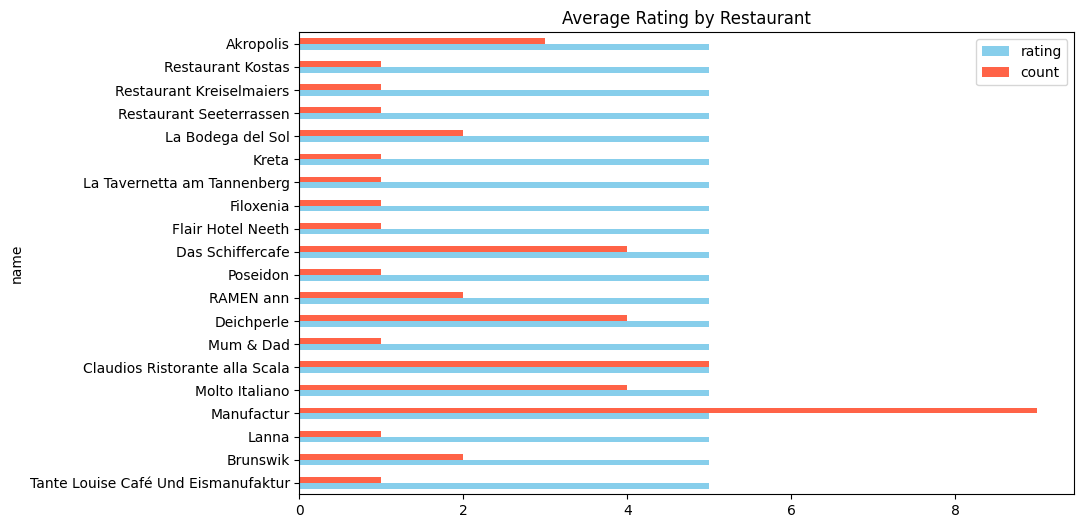

In [26]:
grouped.sort_values(by="rating", ascending=False).head(20).plot(kind='barh', figsize=(10, 6), color=['skyblue', "tomato"], title='Average Rating by Restaurant')

<Axes: title={'center': 'Weighted Average Rating by Restaurant'}, ylabel='name'>

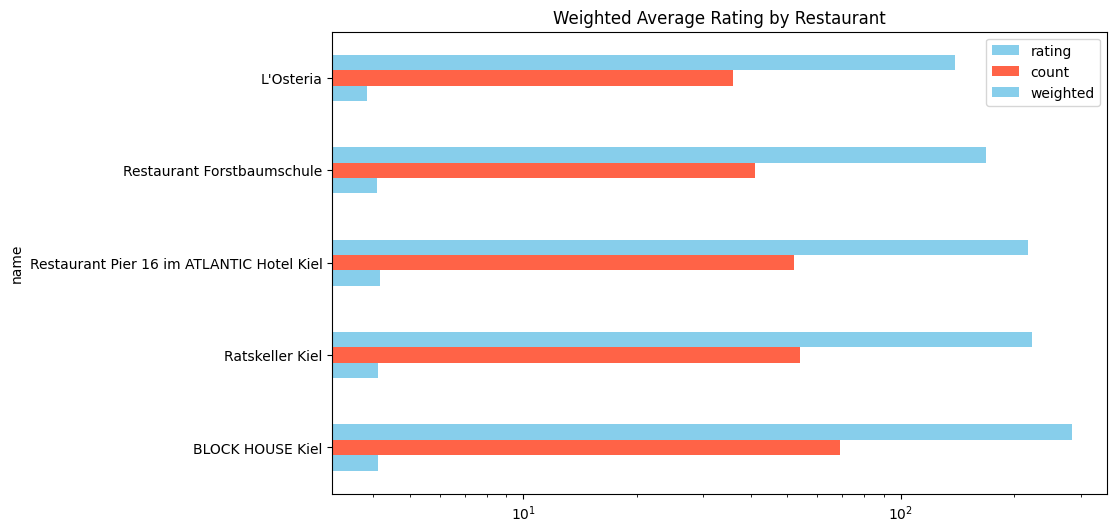

In [32]:
# multiply the rating by the number of occurrences to get a weighted average
grouped['weighted'] = grouped['rating'] * grouped['count']

# sort by weighted average
grouped.sort_values(by="weighted", ascending=False).head(5).plot(kind='barh', figsize=(10, 6), color=['skyblue', "tomato"], title='Weighted Average Rating by Restaurant', logx=True)
